In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Laptop_price.csv')

In [3]:
data.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [5]:
data.shape

(1000, 7)

In [6]:
data["Brand"].unique()

array(['Asus', 'Acer', 'Lenovo', 'HP', 'Dell'], dtype=object)

In [7]:
data.isnull().sum()

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
data.head(2)

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919


In [10]:
data.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


In [11]:
numeric_data = data.select_dtypes(include=['number'])

In [12]:
numeric_data.corr()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
Processor_Speed,1.000000,0.021391,-0.067576,-0.013425,-0.054603,-0.050737
RAM_Size,0.021391,1.000000,0.002111,-0.036002,-0.025382,0.061237
Storage_Capacity,-0.067576,0.002111,1.000000,-0.027560,0.041335,0.997908
Screen_Size,-0.013425,-0.036002,-0.027560,1.000000,0.021995,-0.026740
Weight,-0.054603,-0.025382,0.041335,0.021995,1.000000,0.038417
Price,-0.050737,0.061237,0.997908,-0.026740,0.038417,1.000000


<Axes: >

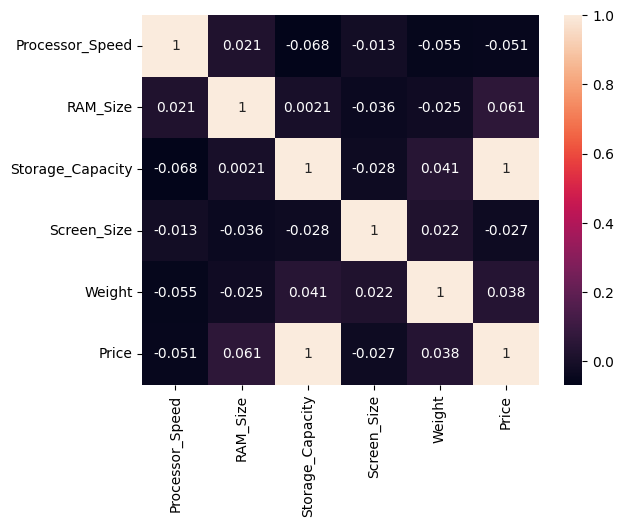

In [13]:
corr = numeric_data.corr()
sns.heatmap(corr,annot=True)

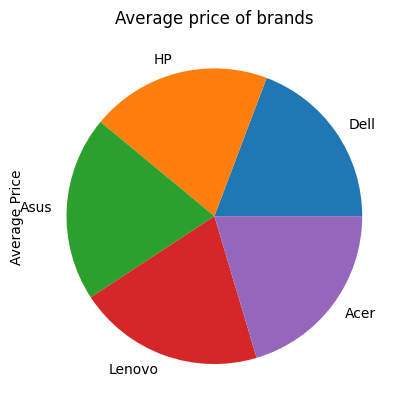

In [14]:
data.groupby('Brand')['Price'].mean().sort_values(ascending = True).plot(kind = 'pie')
plt.title('Average price of brands')
plt.ylabel('Average Price')
plt.show()

In [15]:
data['Brand'].value_counts()

Brand
Dell      210
Asus      206
Acer      204
Lenovo    190
HP        190
Name: count, dtype: int64

In [16]:
x = data[['Processor_Speed', 'RAM_Size', 'Storage_Capacity']]
y = data['Price']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [20]:
len(x_train)

800

In [21]:
len(y_train)

800

In [22]:
len(x_test)

200

In [23]:
len(y_test)

200

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [52]:
rfr_model = RandomForestRegressor(random_state=42)

In [53]:
param_grid_rfr = {
    "max_depth": [2, 5, 10, 15, 20, 25],
    "max_features": ['sqrt', 'log2'],   # 'auto' is deprecated, use 'sqrt' instead
    "n_estimators": [2, 4, 6, 8, 10, 12]
}

In [54]:
grid_rfr = GridSearchCV(
    estimator=rfr_model,
    param_grid=param_grid_rfr,
    cv=3,
    n_jobs=-1,
    verbose=2
)


In [55]:
grid_rfr.fit(x_train, y_train)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [2, 5, ...], 'max_features': ['sqrt', 'log2'], 'n_estimators': [2, 4, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,12


In [56]:
grid_rfr.best_params_

{'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 12}

In [58]:
rfr_pred = grid_rfr.predict(x_test)

In [59]:
from sklearn.metrics import mean_absolute_error

In [60]:
mean_absolute_error(y_test,rfr_pred)

340.9261008297188

In [61]:
x.columns

Index(['Processor_Speed', 'RAM_Size', 'Storage_Capacity'], dtype='object')

In [64]:
import joblib
joblib.dump(grid_rfr , 'rf_model.pkl')

['rf_model.pkl']